In [0]:
#Import if path is not correctly setted
import os, sys
print(os.getcwd())
sys.path.append(os.getcwd()+"/..")
# simple Example plot Enveloped Potential with two Harmonic Oscilators

##Imports:
import matplotlib.pyplot as plt
import math, numpy as np, itertools as it

%matplotlib inline

#Ensembler Packages
import ensembler.potentials as p
import ensembler.potentials.TwoD as pot
import ensembler.visualisation.plotPotentials as exPlot


# 2D Harmonic Oscilator

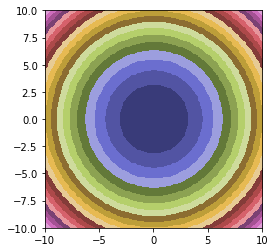

In [4]:
resolution = 250
positions = np.linspace(-10,10, resolution)
positions_2D = np.array(list(it.product(positions, positions)))

V1 = pot.harmonicOsc()
ene = V1.ene(positions_2D)

plt.imshow(ene.reshape([resolution,resolution]), extent=[min(positions), max(positions), min(positions), max(positions)], cmap="tab20b")

# 2D - Wave Potential

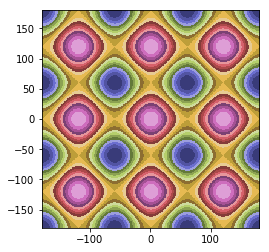

In [13]:
resolution = 360
positions = np.linspace(-180,180,resolution)
positions_2D = np.array(list(it.product(positions, positions)))

V = pot.wavePotential(multiplicity=[3,3], amplitude=[1,1], phase_shift=[0, 0])
ene = V.ene(positions_2D)

plt.imshow(ene.reshape([resolution,resolution]), extent=[-180,180,-180,180], cmap = "tab20b")


In [1]:
resolution = 360
positions = np.linspace(-180,180,resolution)
positions_2D = np.array(list(it.product(positions, positions)))

V1 = pot.wavePotential(multiplicity=[3,2], amplitude=[1,3], phase_shift=[0, 0])
V2 = pot.wavePotential(multiplicity=[3,2], amplitude=[1,3], phase_shift=[0, 0])
edsPot = p

ene = p.ene(positions_2D)

plt.imshow(ene.reshape([resolution,resolution]), extent=[-180,180,-180,180], cmap = "tab20b")


NameError: name 'np' is not defined

# Experimental Swiss Potential

In [2]:

def build_energy_map(potential, positions1, positions2):
    energy_map=[]
    for x in positions1:
        row = potential.ene(list(map(lambda y:[x, y], positions2)))
        energy_map.append(row)
    energy_map= np.array(energy_map)
    return energy_map



In [3]:
SwissPot = pot.swissPotential(inverse=True)
SwissPot.look_up_table.shape


(11078, 17485)

In [4]:
positions1= list(range(0,SwissPot.shape[0]-1, 100))
positions2= list(range(0,SwissPot.shape[1]-1, 100))

SwissPot.set_Inverse(True)

energy_map1= build_energy_map(SwissPot, positions1, positions2)
    
print(energy_map1.shape)
print(energy_map1)
print(np.min(energy_map1), np.max(energy_map1))


(111, 175)
[[32767. 32767. 32767. ... 32767. 32767. 32767.]
 [32767. 32767. 32767. ... 32767. 32767. 32767.]
 [32767. 32767. 32767. ... 32767. 32767. 32767.]
 ...
 [32767. 32767. 32767. ... 32767. 32767. 32767.]
 [32767. 32767. 32767. ... 32767. 32767. 32767.]
 [32767. 32767. 32767. ... 32767. 32767. 32767.]]
-4448.1 32767.0


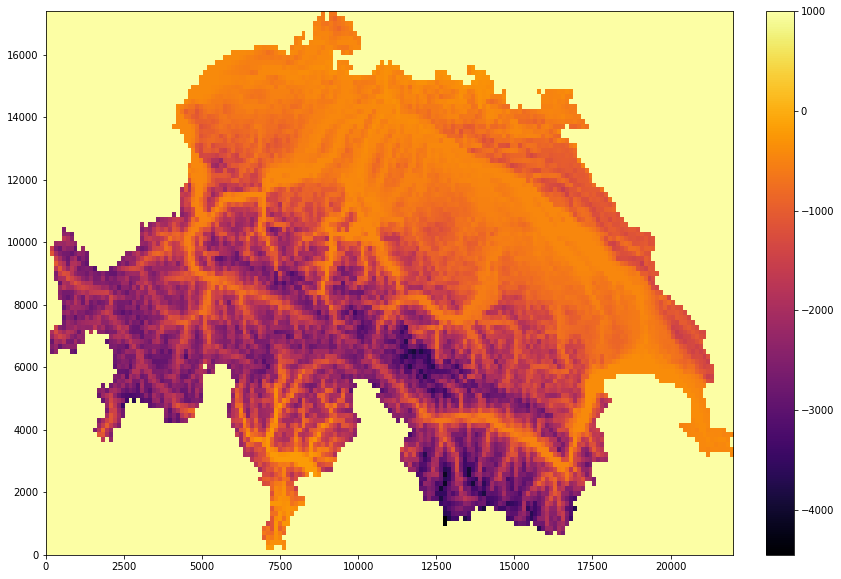

In [15]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=[15,10])

Vmin, Vmax = (np.min(energy_map1),1000)
surf = ax1.imshow(energy_map1, cmap="inferno", interpolation="nearest", origin='center', vmin=Vmin, vmax=Vmax, extent=[min(positions1)*2, max(positions1)*2, min(positions2), max(positions2)])
fig.colorbar(surf,fraction=0.046, pad= 0.04)


In [6]:
from ensembler.potentials.ND import envelopedPotential
eds_pot = envelopedPotential([SwissPot])

In [7]:
positions1= list(range(0,SwissPot.shape[0]-1, 100))
positions2= list(range(0,SwissPot.shape[1]-1, 100))

eds_pot.s=1
energy_map1 = build_energy_map(eds_pot, positions1, positions2)
print(energy_map1.shape)
print(np.min(energy_map1), np.max(energy_map1))

#Emap 2
eds_pot.s=0.01
energy_map2 = build_energy_map(eds_pot, positions1, positions2)

print(energy_map2.shape)
print(np.min(energy_map2), np.max(energy_map2))

#EMAP3
eds_pot.s=0.001
energy_map3 = build_energy_map(eds_pot, positions1, positions2)
print(energy_map3.shape)
print(np.min(energy_map3), np.max(energy_map3))


#EMAP4
eds_pot.s=0.0005
energy_map4 = build_energy_map(eds_pot, positions1, positions2)
print(energy_map4.shape)
print(np.min(energy_map4), np.max(energy_map4))

#EMAP5
eds_pot.s=0.0001
energy_map5 = build_energy_map(eds_pot, positions1, positions2)

print(energy_map5.shape)
print(np.min(energy_map5), np.max(energy_map5))

(111, 175)
-4448.79345703125 32766.306640625
(111, 175)
-4517.41455078125 32697.68359375
(111, 175)
-5141.2470703125 32073.85546875
(111, 175)
-5834.39453125 31380.70703125
(111, 175)
-11379.572265625 25835.529296875


-4448.79345703125 1000


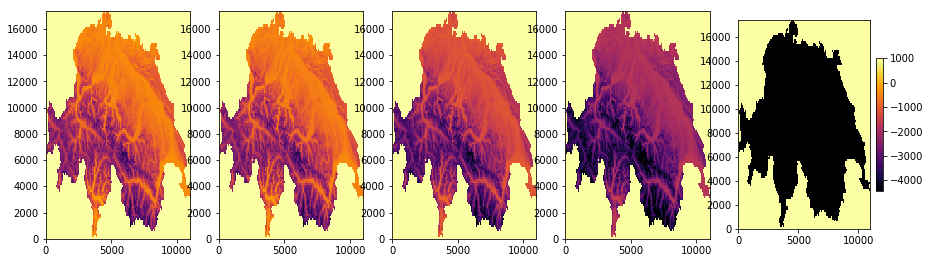

In [16]:
fig, (ax1,ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=[15,10])
#Vmin, Vmax = (-500,4620)
Vmin, Vmax = (np.min(energy_map1),1000)

print(Vmin, Vmax)

surf1 = ax1.imshow(energy_map1, cmap="inferno", interpolation="nearest", origin='center', vmin=Vmin, vmax=Vmax, extent=[min(positions1), max(positions1), min(positions1), max(positions2)])
surf2 = ax2.imshow(energy_map2, cmap="inferno", interpolation="nearest", origin='center', vmin=Vmin, vmax=Vmax, extent=[min(positions1), max(positions1), min(positions1), max(positions2)])
surf3 = ax3.imshow(energy_map3, cmap="inferno", interpolation="nearest", origin='center', vmin=Vmin, vmax=Vmax, extent=[min(positions1), max(positions1), min(positions1), max(positions2)])
surf4 = ax4.imshow(energy_map4, cmap="inferno", interpolation="nearest", origin='center', vmin=Vmin, vmax=Vmax, extent=[min(positions1), max(positions1), min(positions1), max(positions2)])
surf5 = ax5.imshow(energy_map5, cmap="inferno", interpolation="nearest", origin='center', vmin=Vmin, vmax=Vmax, extent=[min(positions1), max(positions1), min(positions1), max(positions2)])
fig.colorbar(surf,fraction=0.046, pad=0.04)


-4448.79345703125 1000


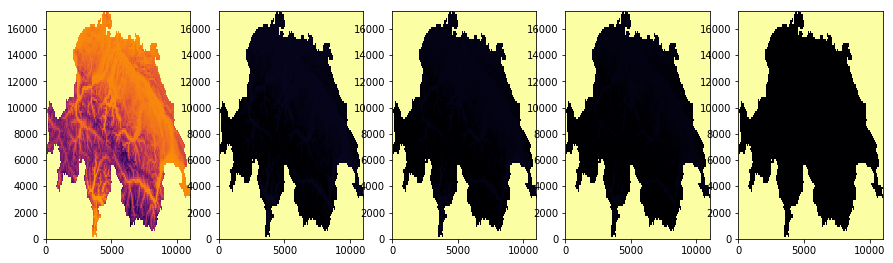

In [18]:
fig, (ax1,ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=[15,10])
Vmin, Vmax = (np.min(energy_map1),1000)

print(Vmin, Vmax)

surf1 = ax1.imshow(energy_map1, cmap="inferno", interpolation="nearest", origin='center', vmin=Vmin, vmax=Vmax, extent=[min(positions1), max(positions1), min(positions1), max(positions2)])
Vmin, Vmax = (np.min(energy_map2)-0.5*np.min(energy_map2), np.max(energy_map2))

surf2 = ax2.imshow(energy_map2, cmap="inferno", interpolation="nearest", origin='center', vmin=Vmin, vmax=Vmax, extent=[min(positions1), max(positions1), min(positions1), max(positions2)])
Vmin, Vmax = (np.min(energy_map3)-0.5*np.min(energy_map3), np.max(energy_map3))

surf3 = ax3.imshow(energy_map3, cmap="inferno", interpolation="nearest", origin='center', vmin=Vmin, vmax=Vmax, extent=[min(positions1), max(positions1), min(positions1), max(positions2)])
Vmin, Vmax = (np.min(energy_map4)-0.5*np.min(energy_map4), np.max(energy_map4))

surf4 = ax4.imshow(energy_map4, cmap="inferno", interpolation="nearest", origin='center', vmin=Vmin, vmax=Vmax, extent=[min(positions1), max(positions1), min(positions1), max(positions2)])
Vmin, Vmax = (np.min(energy_map5)-0.5*np.min(energy_map5), np.max(energy_map5))

surf5 = ax5.imshow(energy_map5, cmap="inferno", interpolation="nearest", origin='center', vmin=Vmin, vmax=Vmax, extent=[min(positions1), max(positions1), min(positions1), max(positions2)])


In [19]:


eds_pot.s=-1
energy_map1 = build_energy_map(eds_pot, positions1, positions2)
print(energy_map1.shape)
print(np.min(energy_map1), np.max(energy_map1))

#Emap 2
eds_pot.s=-0.01
energy_map2= build_energy_map(eds_pot, positions1, positions2)
print(energy_map2.shape)
print(np.min(energy_map2), np.max(energy_map2))

#EMAP3
eds_pot.s=-0.001
energy_map3 = build_energy_map(eds_pot, positions1, positions2)
print(energy_map3.shape)
print(np.min(energy_map3), np.max(energy_map3))

#EMAP4
eds_pot.s=-0.0001
energy_map4 = build_energy_map(eds_pot, positions1, positions2)
print(energy_map4.shape)
print(np.min(energy_map4), np.max(energy_map4))

#EMAP5
eds_pot.s=-0.00001
energy_map5 = build_energy_map(eds_pot, positions1, positions2)
print(energy_map5.shape)
print(np.min(energy_map5), np.max(energy_map5))


(111, 175)
-4447.40673828125 32767.693359375
(111, 175)
-4378.78515625 32836.3125
(111, 175)
-3754.952880859375 33460.1484375
(111, 175)
2483.371826171875 39698.47265625
(111, 175)
64866.62109375 102081.71875


-4447.40673828125 1000


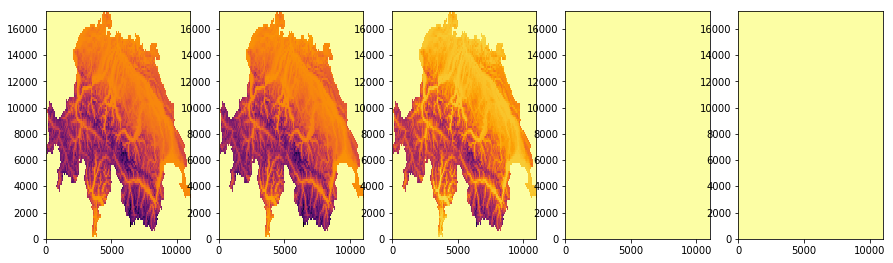

In [20]:
fig, (ax1,ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=[15,10])
Vmin, Vmax = (np.min(energy_map1),1000)

print(Vmin, Vmax)

surf1 = ax1.imshow(energy_map1, cmap="inferno", interpolation="nearest", origin='center', vmin=Vmin, vmax=Vmax, extent=[min(positions1), max(positions1), min(positions1), max(positions2)])
surf2 = ax2.imshow(energy_map2, cmap="inferno", interpolation="nearest", origin='center', vmin=Vmin, vmax=Vmax, extent=[min(positions1), max(positions1), min(positions1), max(positions2)])
surf3 = ax3.imshow(energy_map3, cmap="inferno", interpolation="nearest", origin='center', vmin=Vmin, vmax=Vmax, extent=[min(positions1), max(positions1), min(positions1), max(positions2)])
surf4 = ax4.imshow(energy_map4, cmap="inferno", interpolation="nearest", origin='center', vmin=Vmin, vmax=Vmax, extent=[min(positions1), max(positions1), min(positions1), max(positions2)])
surf5 = ax5.imshow(energy_map5, cmap="inferno", interpolation="nearest", origin='center', vmin=Vmin, vmax=Vmax, extent=[min(positions1), max(positions1), min(positions1), max(positions2)])


In [21]:
from ensembler.integrator import monteCarloIntegrator, metropolisMonteCarloIntegrator
from ensembler.integrator import positionVerletIntegrator, leapFrogIntegrator
from ensembler.conditions.periodicBoundaryCondition import periodicBoundaryCondition 
from ensembler.system import system

print(SwissPot)
setattr(eds_pot, "nStates", 1)
setattr(eds_pot, "nDim", 2)
print(eds_pot)

SwissPotential
	States: 1
	Dimensions: 2


Enveloping potential
	States: 1
	Dimensions: 2

	Enveloped Potentials: 
		SwissPotential
			States: 1
			Dimensions: 2
		
		



In [22]:
eds_pot.s = 0.001
sys = system(potential=eds_pot, integrator=metropolisMonteCarloIntegrator())

Ensembler.src.potentials._baseclassesin _set_singlePos_mode  2
STATES ARE BIIG
[-8.26679429 -8.73534538]
[[-8.26679429 -8.73534538]]


In [23]:
sys.simulate(1000)

[[-8.26679429 -8.73534538]]


State(position=array([[34.72664435,  4.79758901]]), temperature=298.0, totEnergy=32073.852819440057, totPotEnergy=32073.852819440057, totKinEnergy=nan, dhdpos=array([-0.48781148,  0.77586573]), velocity=None)

In [24]:
traj = sys.getTrajectory()

In [25]:
sampled= np.array([p[0] for p in traj.position])
positions1= list(range(0,SwissPot.shape[0]-1, 100))
positions2= list(range(0,SwissPot.shape[1]-1, 100))



0.0 4500


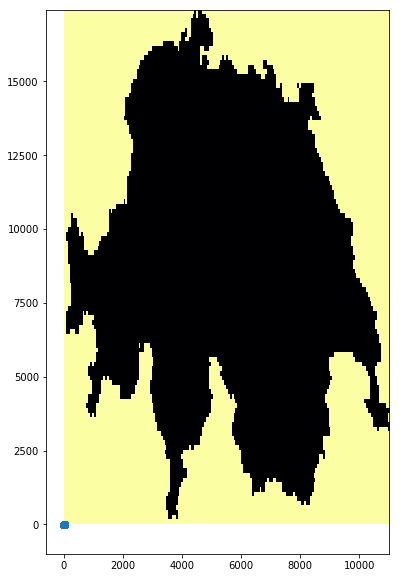

In [26]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=[15,10])
Vmin, Vmax = (np.min(positions1)-0.5*np.min(positions1), 4500)

eds_pot = envelopedPotential([SwissPot])
eds_pot.s = sys.potential.s
energy_map = build_energy_map(eds_pot, positions1, positions2)
print(Vmin, Vmax)

surf1 = ax1.imshow(energy_map, cmap="inferno", interpolation="nearest", origin='center', vmin=Vmin, vmax=Vmax, extent=[min(positions1), max(positions1), min(positions2), max(positions2)])
ax1.scatter(sampled[:,0], sampled[:,1])
